1. Importanta atributelor

In [5]:
import pandas as pd

file_path = '/Users/user/Documents/GitHub/FacultateAI/Homework/dataset.xlsx' 
data = pd.read_excel(file_path)

print(data.head())

atribute = data.columns
print("Atributele din setul de date sunt:")
print(atribute)


   Row.names              Horodateur Sexe       Age Race Nombre Logement Zone  \
0          1 2021-02-09 16:36:39.042    F  Moinsde1  SBI      3      ASB    U   
1         10 2021-02-12 18:25:58.373    F  Moinsde1  SBI      1      AAB    U   
2        100 2021-03-06 22:04:33.192    F      2a10  EUR      4       ML    U   
3       1000 2021-02-18 16:10:11.117    F  Moinsde1  EUR      1       ML    R   
4       1001 2021-02-18 18:00:50.851    F       1a2  SBI      2       MI    R   

   Ext  Obs  ...  Brutal  Dominant  Agressif  Impulsif  Prévisible  Distrait  \
0    0    0  ...       1         1         1         1           1         1   
1    0    2  ...       2         2         3         4           4         3   
2    0    2  ...       1         1         1         2           4         2   
3    2    2  ...       4         3         3         3           4         4   
4    1    2  ...       2         4         1         4           3         3   

   Abondance  PredOiseau  PredMa

In [7]:
atribute_formatate = " | ".join(atribute)
print("Atributele din setul de date sunt:")
print(atribute_formatate)


Atributele din setul de date sunt:
Row.names | Horodateur | Sexe | Age | Race | Nombre | Logement | Zone | Ext | Obs | Timide | Calme | Effrayé | Intelligent | Vigilant | Perséverant | Affectueux | Amical | Solitaire | Brutal | Dominant | Agressif | Impulsif | Prévisible | Distrait | Abondance | PredOiseau | PredMamm | Plus


In [18]:
from googletrans import Translator

file_path = '/Users/user/Documents/GitHub/FacultateAI/Homework/dataset.xlsx' 
data = pd.read_excel(file_path)

atribute = list(data.columns)

translator = Translator()

atribute_traduse = [translator.translate(atribut, src='fr', dest='en').text for atribut in atribute]

print(atribute_formatate)
print(" | ".join(atribute_traduse))


Row.names | Horodateur | Sexe | Age | Race | Nombre | Logement | Zone | Ext | Obs | Timide | Calme | Effrayé | Intelligent | Vigilant | Perséverant | Affectueux | Amical | Solitaire | Brutal | Dominant | Agressif | Impulsif | Prévisible | Distrait | Abondance | PredOiseau | PredMamm | Plus
ROW.NAMES | Parliament | Sex | Age | Breed | Number | Accommodation | Area | Outdoor | Obs | Shy | Calm | Afraid | Clever | Vigilant | Persevering | Affectionate | Friendly | Lonely | Brutal | Dominant | Aggressive | Impulsive | Predictable | Distracted | Abundance | Predoiseau | Predmamm | More


Atribute de care sa scapam :
- Horodateur = data pisicii
- Sexe = ce sex are (nu conteaza F sau M in predictia modelului)
- Age = la fel nu conteaza
- Logement = unde o tii (apartament cu doua camere, casa) de ce ar conta asta ?

In [24]:
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("Coloane non-numerice:", non_numeric_columns)


Coloane non-numerice: Index(['Horodateur', 'Sexe', 'Age', 'Race', 'Nombre', 'Logement', 'Zone',
       'Abondance', 'Plus'],
      dtype='object')


In [26]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Sexe', 'Race', 'Zone', 'Abondance', 'Plus']  

encoder = LabelEncoder()

for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

print(data[categorical_columns])


      Sexe  Race  Zone  Abondance  Plus
0        0    12     2          3   803
1        0    12     2          3   803
2        0     4     2          3   257
3        0     4     1          2   288
4        0    12     1          2   803
...    ...   ...   ...        ...   ...
3138     0     9     1          2   519
3139     0     5     1          2   803
3140     1     0     0          2   803
3141     1     1     1          2   803
3142     0     1     0          2   803

[3143 rows x 5 columns]


In [27]:
print(data.columns)

Index(['Row.names', 'Horodateur', 'Sexe', 'Age', 'Race', 'Nombre', 'Logement',
       'Zone', 'Ext', 'Obs', 'Timide', 'Calme', 'Effrayé', 'Intelligent',
       'Vigilant', 'Perséverant', 'Affectueux', 'Amical', 'Solitaire',
       'Brutal', 'Dominant', 'Agressif', 'Impulsif', 'Prévisible', 'Distrait',
       'Abondance', 'PredOiseau', 'PredMamm', 'Plus'],
      dtype='object')


In [56]:
coloane_de_eliminat = ['Horodateur', 'Sexe', 'Age', 'Logement', 'Plus']

data_reduced = data.drop(columns=coloane_de_eliminat)
#coloana_plus = data['Plus']

print(data_reduced.head())
print(data.head())




   Row.names  Race Nombre  Zone  Ext  Obs  Timide  Calme  Effrayé  \
0          1    12      3     2    0    0       1      1        1   
1         10    12      1     2    0    2       1      1        3   
2        100     4      4     2    0    2       4      4        3   
3       1000     4      1     1    2    2       3      2        2   
4       1001    12      2     1    1    2       1      4        1   

   Intelligent  ...  Solitaire  Brutal  Dominant  Agressif  Impulsif  \
0            1  ...          1       1         1         1         1   
1            4  ...          1       2         2         3         4   
2            5  ...          2       1         1         1         2   
3            4  ...          3       4         3         3         3   
4            5  ...          1       2         4         1         4   

   Prévisible  Distrait  Abondance  PredOiseau  PredMamm  
0           1         1          3           4         4  
1           4         3          3

In [ ]:
for index, atribut in data['Nombre'].items():
    if atribut == 6: # initial era Plusde5 
        data.at[index, 'Nombre'] = '6'
        
for atribut in data['Nombre']:
    print(atribut)


In [60]:
noul_fisier = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_curatat.xlsx'
data_reduced.to_excel(noul_fisier, index=False) 
print(f"Datasetul curățat a fost salvat în {noul_fisier}")

Datasetul curățat a fost salvat în /Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_curatat.xlsx


In [ ]:
import pandas as pd

file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_curatat.xlsx'
data = pd.read_excel(file_path)

data['Nombre'] = pd.to_numeric(data['Nombre'], errors='coerce')

#print(data['Nombre'])


In [65]:
import pandas as pd

file_path = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_curatat.xlsx'
data = pd.read_excel(file_path)

data_cleaned = data.drop_duplicates()

output_file = '/Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_curatat_v2.xlsx'
data_cleaned.to_excel(output_file, index=False)

print(f"Fișierul curățat a fost salvat la: {output_file}")


Fișierul curățat a fost salvat la: /Users/user/Documents/GitHub/FacultateAI/Dataset/dataset_curatat_v2.xlsx


Zone
1    1227
2    1100
0     816
Name: count, dtype: int64


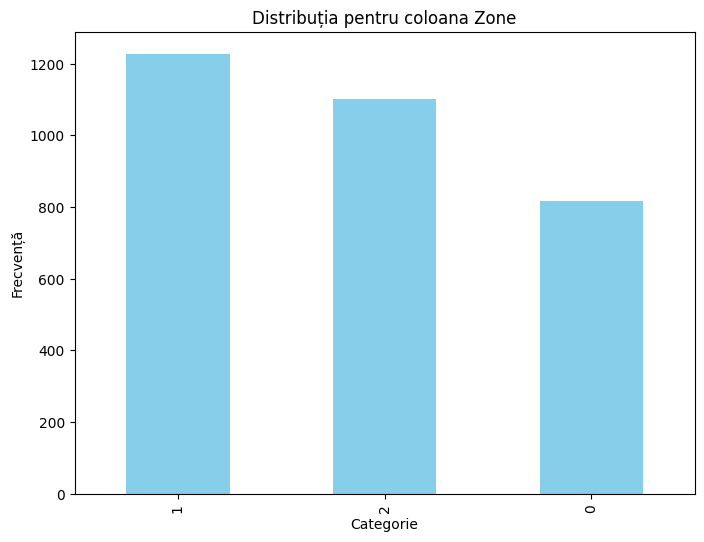

In [70]:
import matplotlib.pyplot as plt

distributie = data['Zone'].value_counts()

print(distributie)

distributie.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Distribuția pentru coloana Zone')
plt.xlabel('Categorie')
plt.ylabel('Frecvență')
plt.show()


Histogramă pentru coloana Row.names


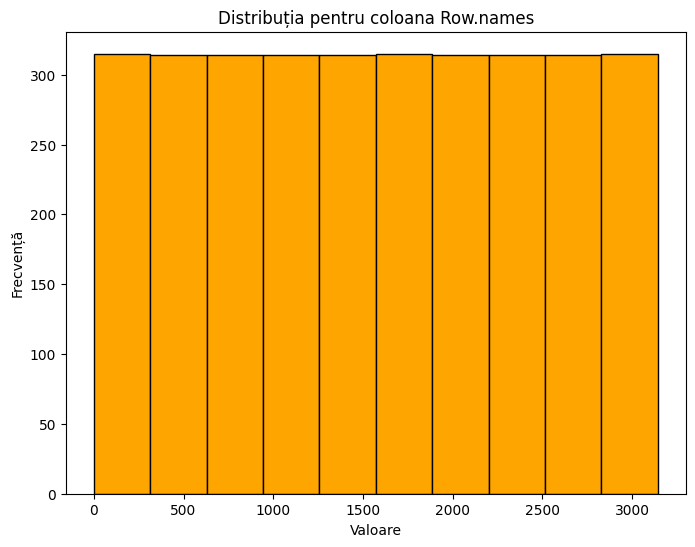

Histogramă pentru coloana Race


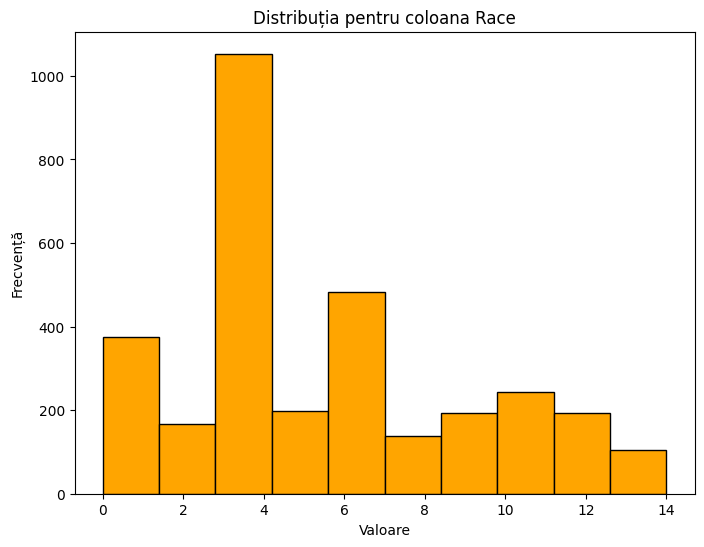

Histogramă pentru coloana Nombre


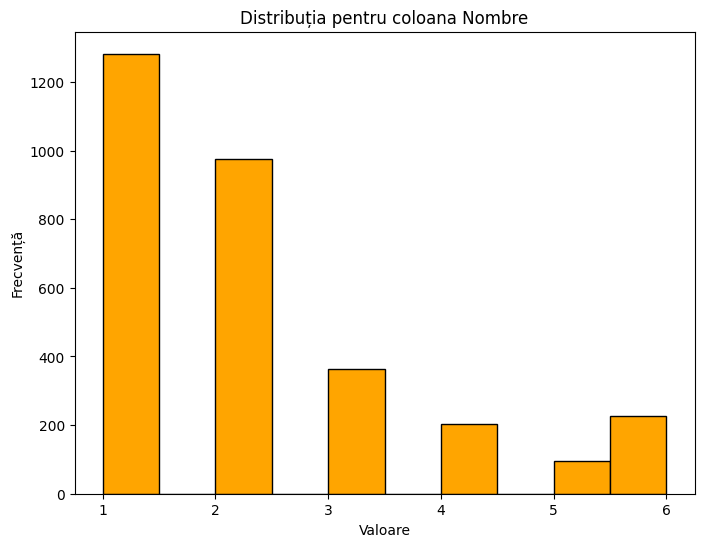

Histogramă pentru coloana Zone


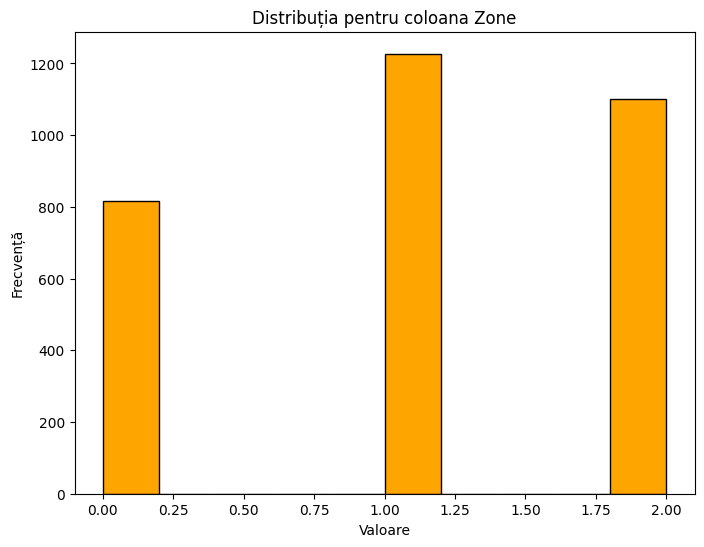

Histogramă pentru coloana Ext


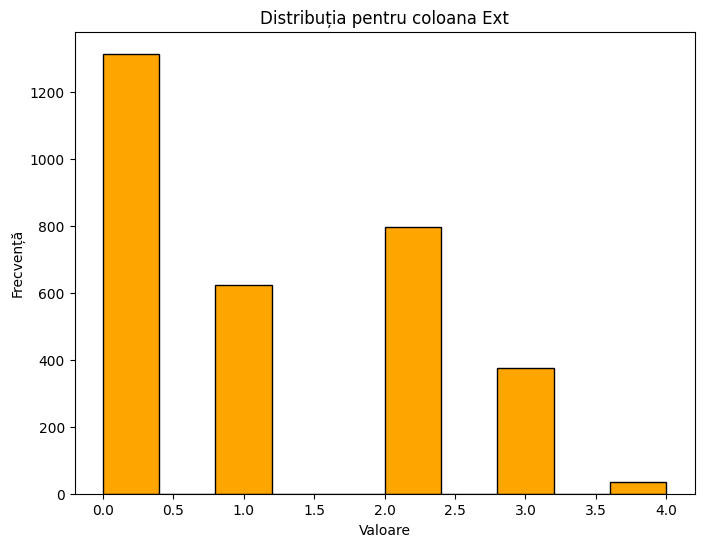

Histogramă pentru coloana Obs


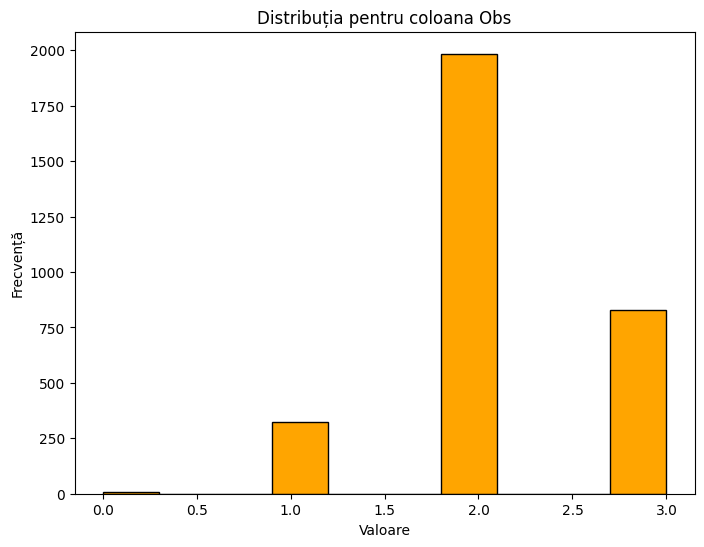

Histogramă pentru coloana Timide


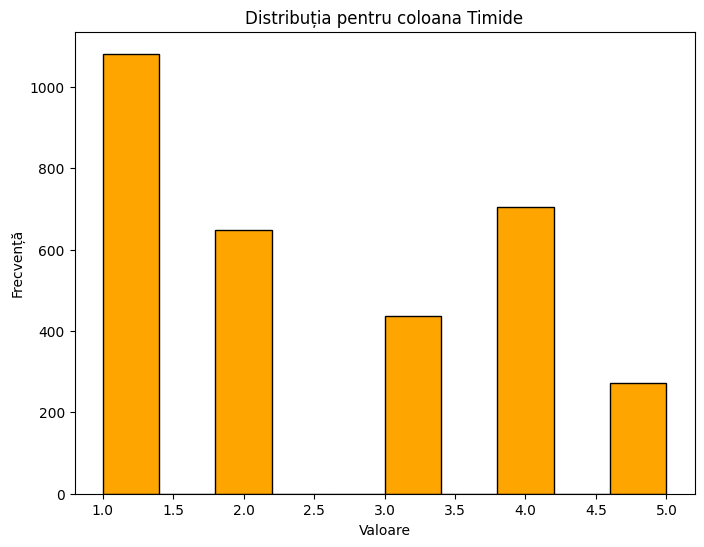

Histogramă pentru coloana Calme


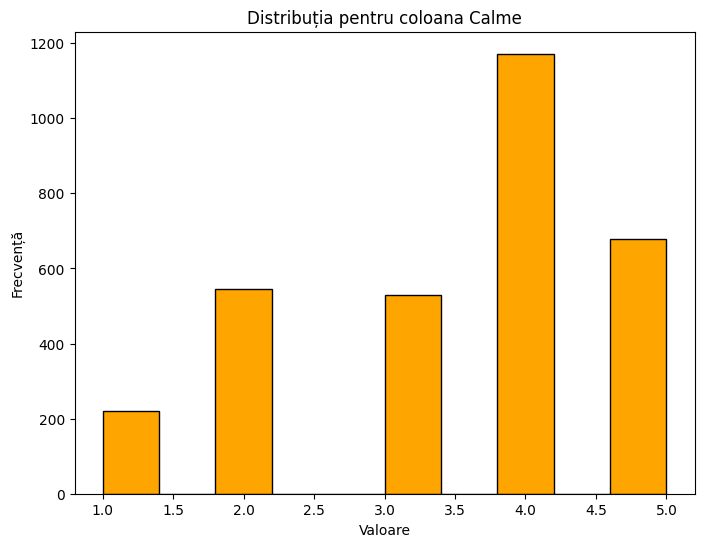

Histogramă pentru coloana Effrayé


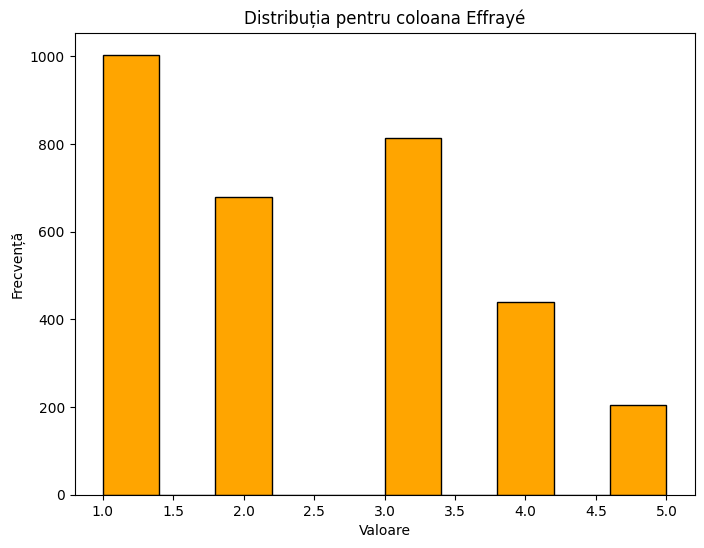

Histogramă pentru coloana Intelligent


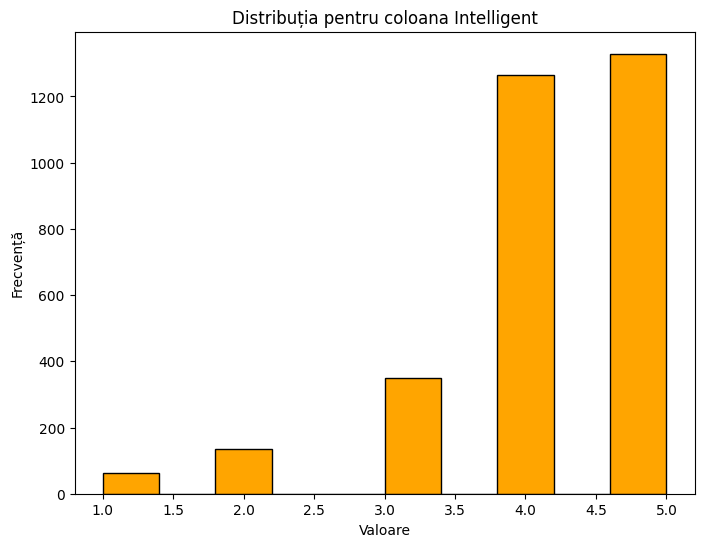

Histogramă pentru coloana Vigilant


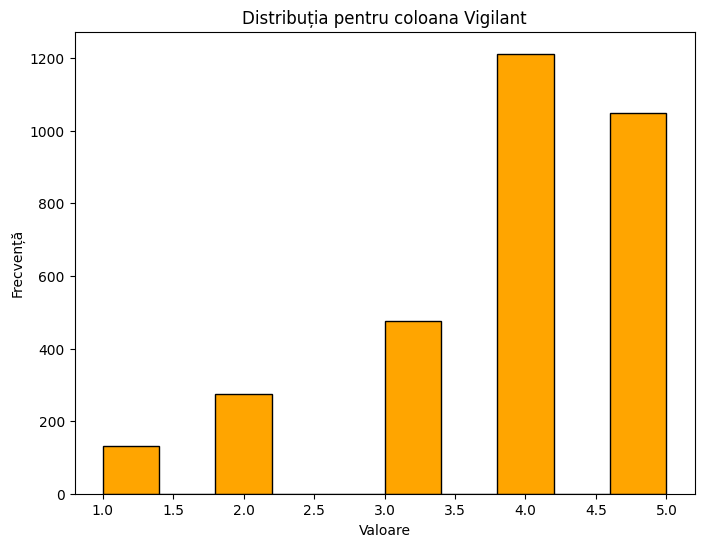

Histogramă pentru coloana Perséverant


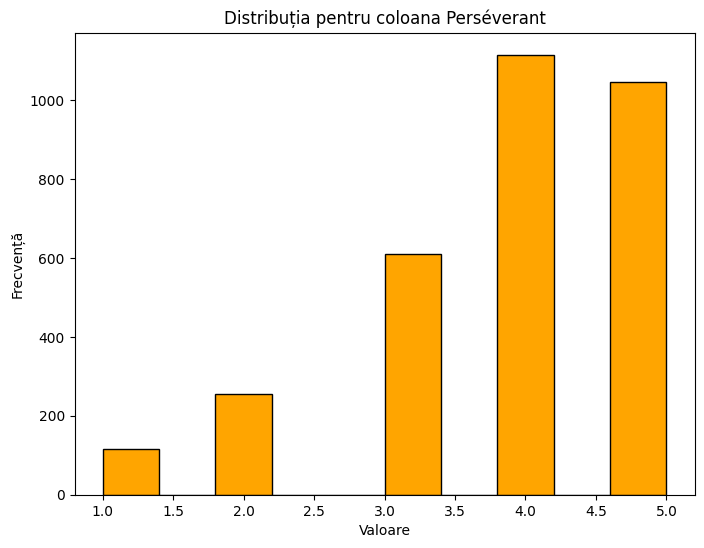

Histogramă pentru coloana Affectueux


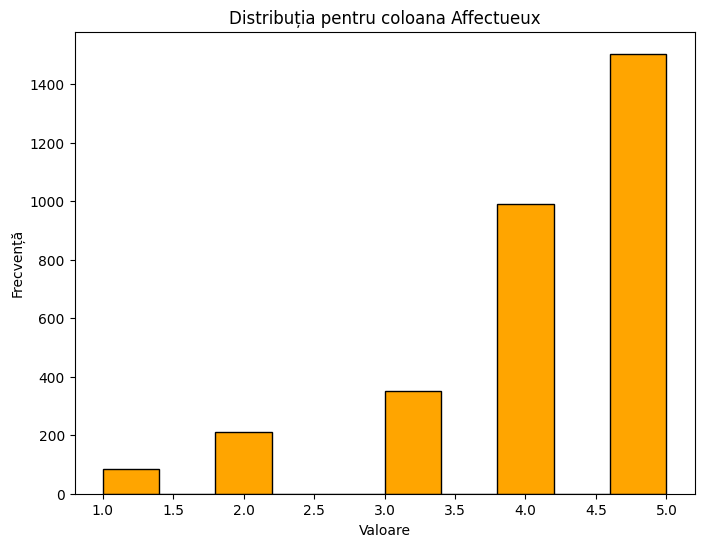

Histogramă pentru coloana Amical


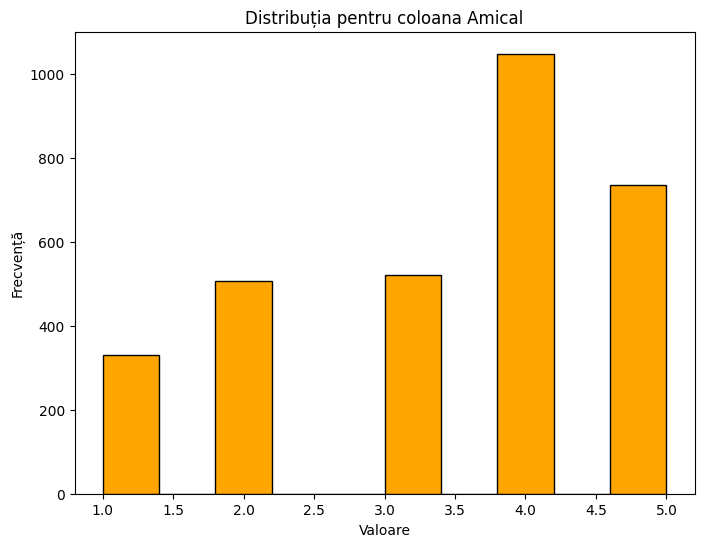

Histogramă pentru coloana Solitaire


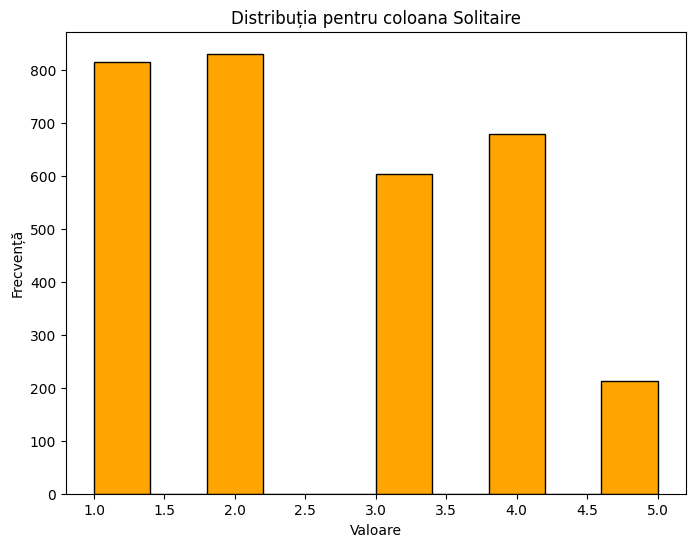

Histogramă pentru coloana Brutal


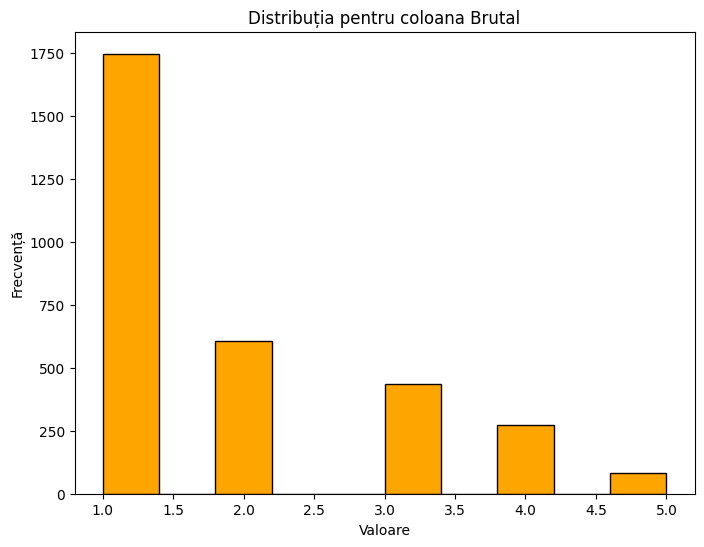

Histogramă pentru coloana Dominant


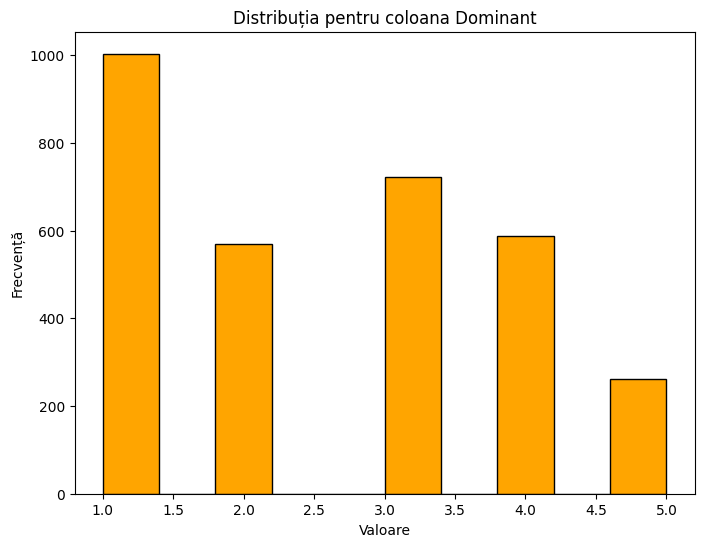

Histogramă pentru coloana Agressif


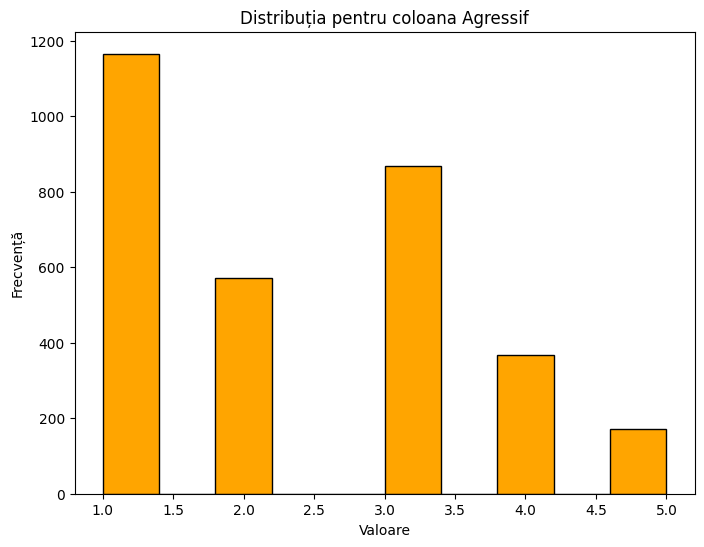

Histogramă pentru coloana Impulsif


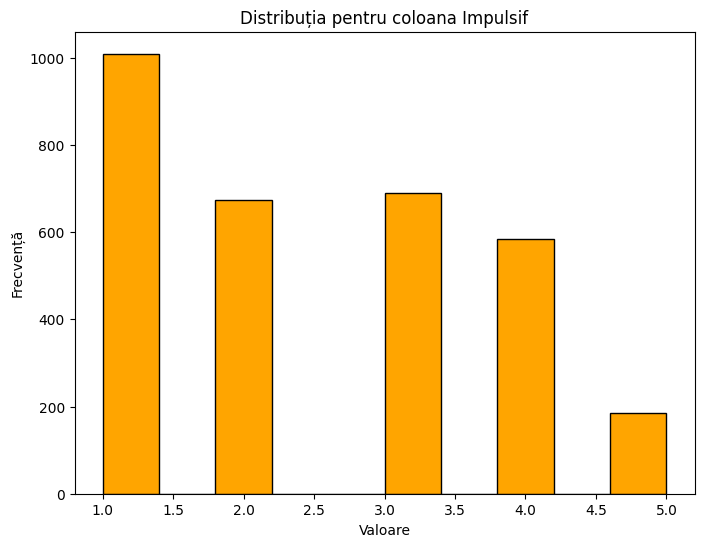

Histogramă pentru coloana Prévisible


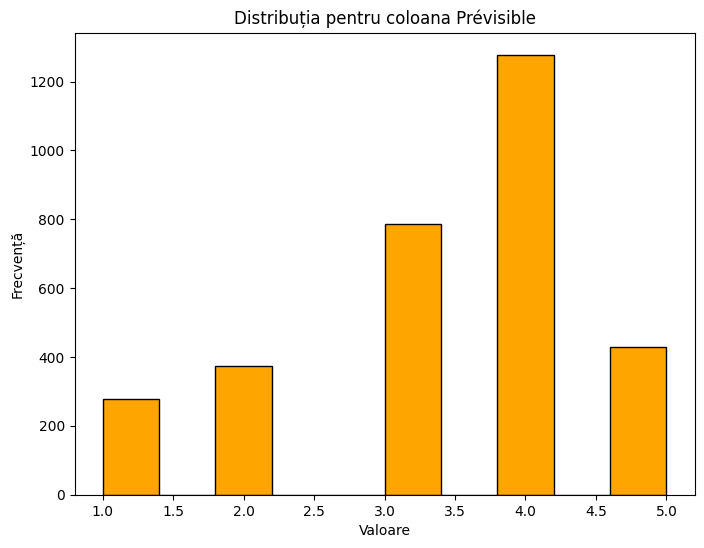

Histogramă pentru coloana Distrait


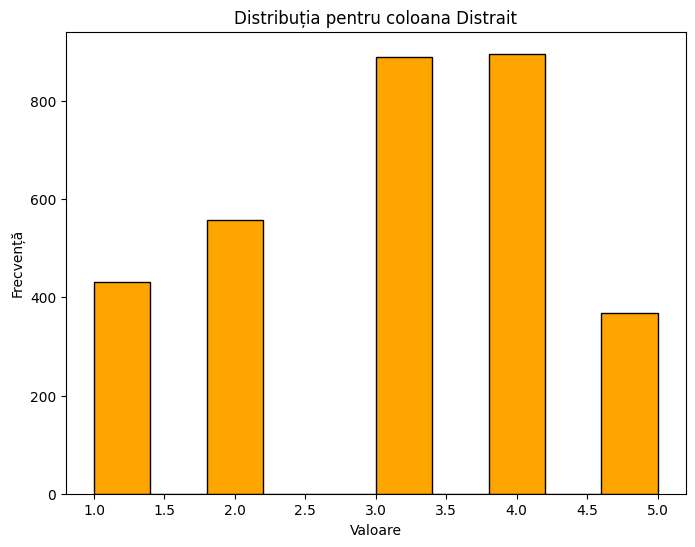

Histogramă pentru coloana Abondance


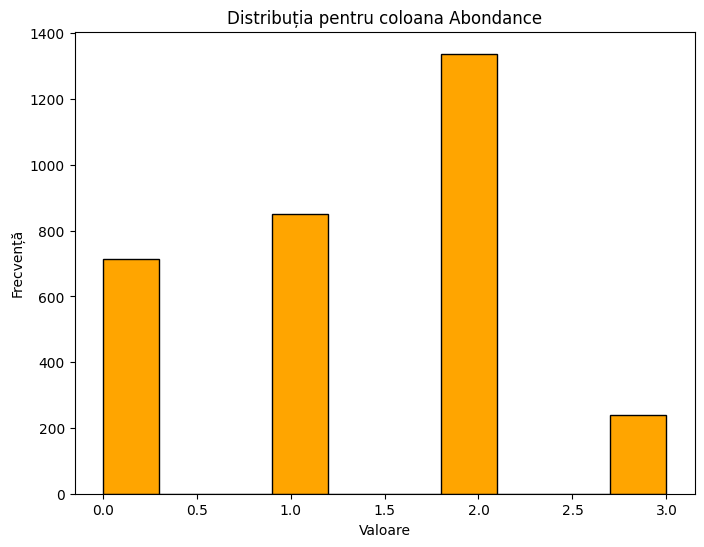

Histogramă pentru coloana PredOiseau


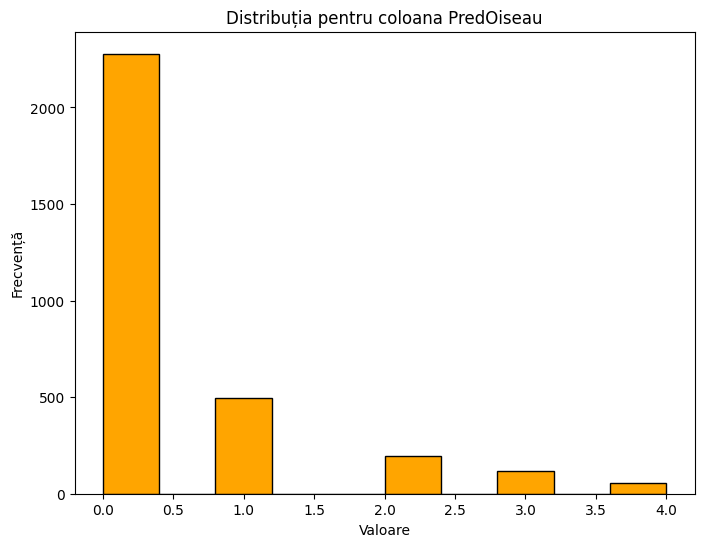

Histogramă pentru coloana PredMamm


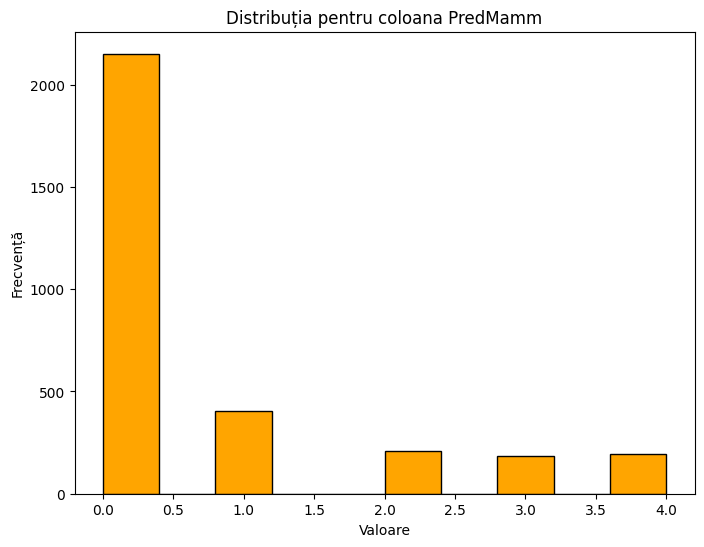

In [69]:
import matplotlib.pyplot as plt

for column in data_cleaned.columns:
    if data_cleaned[column].dtype == 'object':  
        distributie = data_cleaned[column].value_counts()
        
        print(f"Distribuția pentru coloana {column}:\n{distributie}\n")
        
        distributie.plot(kind='bar', color='skyblue', figsize=(8, 6))
        plt.title(f'Distribuția pentru coloana {column}')
        plt.xlabel('Categorie')
        plt.ylabel('Frecvență')
        plt.show()
        
    elif data_cleaned[column].dtype in ['int64', 'float64']:
        print(f"Histogramă pentru coloana {column}")
        
        data_cleaned[column].plot(kind='hist', bins=10, color='orange', edgecolor='black', figsize=(8, 6))
        plt.title(f'Distribuția pentru coloana {column}')
        plt.xlabel('Valoare')
        plt.ylabel('Frecvență')
        plt.show()


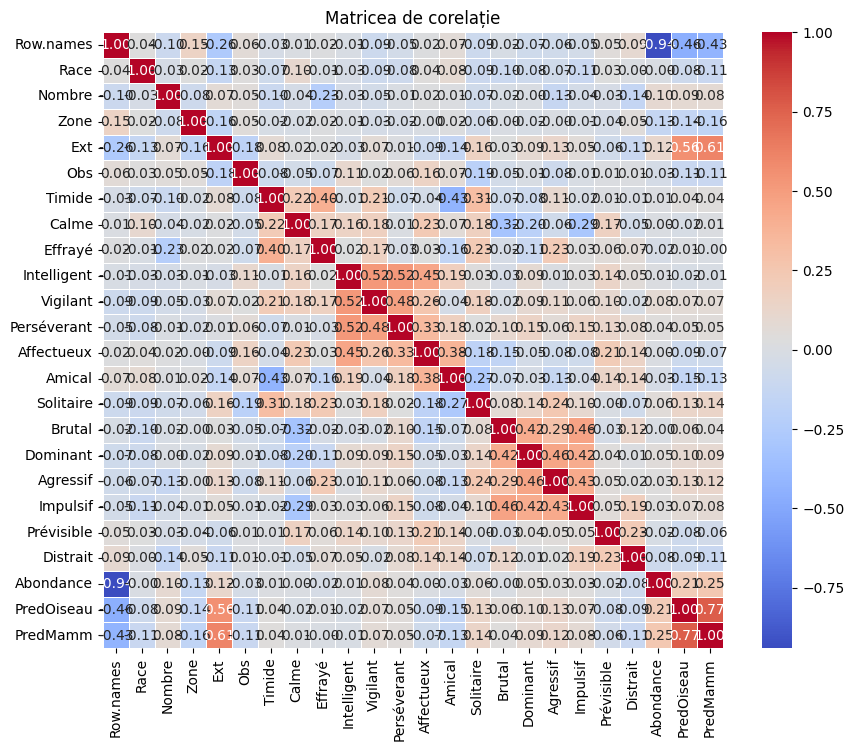

Atributele redundante sunt: {('Abondance', 'Row.names'), ('Row.names', 'Abondance')}


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matricea de corelație")
plt.show()

threshold = 0.9
redundant_columns = set()
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if abs(correlation_matrix.loc[row, col]) > threshold and row != col:
            redundant_columns.add((row, col))

print("Atributele redundante sunt:", redundant_columns)


In [ ]:
"""
!!!! Sunt atribute cu distributii dezechilibrate
-   pentru PredMamm : 0 - nu vaneaza
                      1 - vaneaza foarte rar
                      2 - vaneaza rar , etc.
                      Ce vreau sa fac ?
                        - Combin valorile (1-5) intr o singura valoare : 1 (pentru a echilibra cumva distributia)
                        - 0 - NU vaneaza mamifere
                        - 1 - vaneaza mamifere
- pentru PredOiseau - la fel ca la PredMamm
- pentru a nu elimina complet atributele 
"""

In [75]:
data_cleaned['PredMamm'] = data_cleaned['PredMamm'].apply(lambda x: 1 if x > 0 else 0)

print(data_cleaned['PredMamm'].value_counts())

output_path = 'dataset_curatat_v2.xlsx'  
data_cleaned.to_excel(output_path, index=False)

print(f"Datele modificate au fost salvate in {output_path}")


PredMamm
0    2151
1     992
Name: count, dtype: int64
Datele modificate au fost salvate in dataset_curatat_v2.xlsx


PredMamm
0    2151
1     404
2     208
4     196
3     184
Name: count, dtype: int64


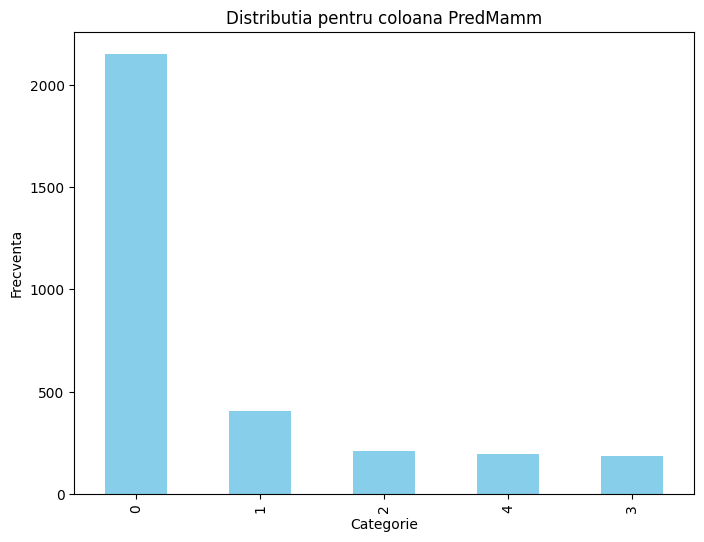

In [77]:
import matplotlib.pyplot as plt

distributie = data['PredMamm'].value_counts()

print(distributie)

distributie.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Distributia pentru coloana PredMamm')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()

PredMamm
0    2151
1     992
Name: count, dtype: int64


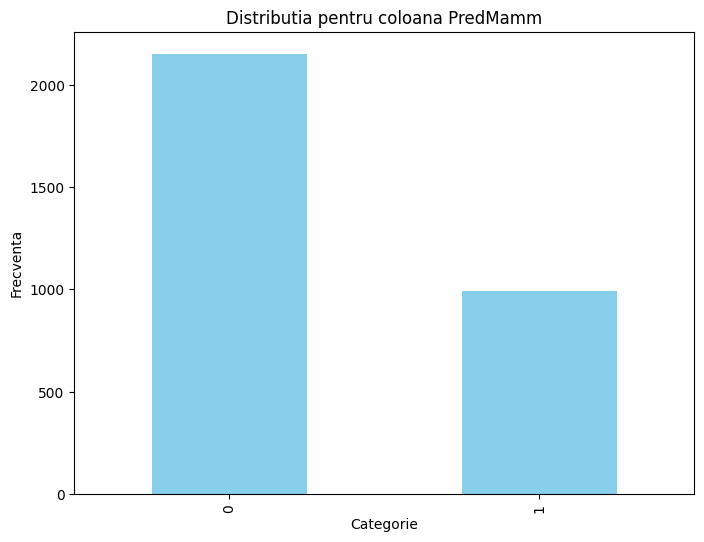

In [76]:
import matplotlib.pyplot as plt

distributie = data_cleaned['PredMamm'].value_counts()

print(distributie)

distributie.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Distributia pentru coloana PredMamm')
plt.xlabel('Categorie')
plt.ylabel('Frecventa')
plt.show()